In [1]:
import pandas as pd

df=pd.read_csv('dirty_cafe_sales.csv')
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2,2.0,4.0,NaN,UNKNOWN,2023-08-30
9996,TXN_9659401,NaN,3,NaN,3.0,Digital Wallet,NaN,2023-06-02
9997,TXN_5255387,Coffee,4,2.0,8.0,Digital Wallet,NaN,2023-03-02
9998,TXN_7695629,Cookie,3,NaN,3.0,Digital Wallet,NaN,2023-12-02


In [2]:
import numpy as np

df.replace(['ERROR', 'UNKNOWN'], np.nan, inplace=True)

In [3]:
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Price Per Unit'] = pd.to_numeric(df['Price Per Unit'], errors='coerce')
df['Total Spent'] = pd.to_numeric(df['Total Spent'], errors='coerce')

In [4]:
mask = df['Total Spent'].isna() & df['Quantity'].notna() & df['Price Per Unit'].notna()
df.loc[mask, 'Total Spent'] = df.loc[mask, 'Quantity'] * df.loc[mask, 'Price Per Unit']

In [5]:
for col in ['Payment Method', 'Location', 'Item']:
    df[col].fillna('Unknown', inplace=True)

C:\Users\I Putu Nanda Aditya\AppData\Local\Temp\ipykernel_24888\381098020.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('Unknown', inplace=True)


In [6]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')

In [7]:
df.isna().sum()

Transaction ID        0
Item                  0
Quantity            479
Price Per Unit      533
Total Spent          40
Payment Method        0
Location              0
Transaction Date    460
dtype: int64

In [8]:
mask = df['Quantity'].isna() & df['Total Spent'].notna() & df['Price Per Unit'].notna()
df.loc[mask, 'Quantity'] = df.loc[mask, 'Total Spent'] / df.loc[mask, 'Price Per Unit']

In [9]:
mask = df['Price Per Unit'].isna() & df['Total Spent'].notna() & df['Quantity'].notna()
df.loc[mask, 'Price Per Unit'] = df.loc[mask, 'Total Spent'] / df.loc[mask, 'Quantity']

In [10]:
mask = df['Total Spent'].isna() & df['Quantity'].notna() & df['Price Per Unit'].notna()
df.loc[mask, 'Total Spent'] = df.loc[mask, 'Quantity'] * df.loc[mask, 'Price Per Unit']

In [12]:
df['Quantity'].fillna(df['Quantity'].median(), inplace=True)
df['Price Per Unit'].fillna(df['Price Per Unit'].median(), inplace=True)
df['Total Spent'].fillna(df['Total Spent'].median(), inplace=True)

C:\Users\I Putu Nanda Aditya\AppData\Local\Temp\ipykernel_24888\1424744906.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Quantity'].fillna(df['Quantity'].median(), inplace=True)
C:\Users\I Putu Nanda Aditya\AppData\Local\Temp\ipykernel_24888\1424744906.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

In [14]:
median_date = df['Transaction Date'].dropna().median()
df['Transaction Date'].fillna(median_date, inplace=True)

C:\Users\I Putu Nanda Aditya\AppData\Local\Temp\ipykernel_24888\1848746346.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Transaction Date'].fillna(median_date, inplace=True)


In [15]:
print(df.isna().sum())

Transaction ID      0
Item                0
Quantity            0
Price Per Unit      0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
dtype: int64


In [22]:
# Ubah tanggal jadi datetime
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])

# Cek distribusi numerik
df[['Quantity', 'Price Per Unit', 'Total Spent']].describe()


,Quantity,Price Per Unit,Total Spent
count,10000.00000,10000.000000,10000.000000
mean,3.02550,2.948100,8.927200
std,1.41748,1.277329,5.992741
min,1.00000,1.000000,1.000000
25%,2.00000,2.000000,4.000000
50%,3.00000,3.000000,8.000000
75%,4.00000,4.000000,12.000000
max,5.00000,5.000000,25.000000


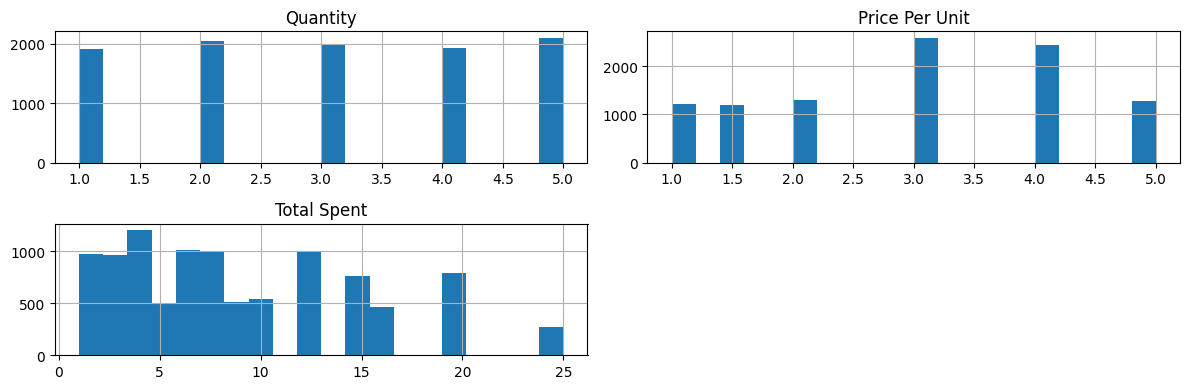

In [26]:
import matplotlib.pyplot as plt

df[['Quantity', 'Price Per Unit', 'Total Spent']].hist(bins=20, figsize=(12, 4))
plt.tight_layout()
plt.show()

In [27]:
# Cek jumlah missing values
missing = df.isna().sum()
print(missing)

# Atau dalam bentuk persentase
(df.isna().mean() * 100).round(2)


Transaction ID      0
Item                0
Quantity            0
Price Per Unit      0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
dtype: int64


Transaction ID      0.0
Item                0.0
Quantity            0.0
Price Per Unit      0.0
Total Spent         0.0
Payment Method      0.0
Location            0.0
Transaction Date    0.0
dtype: float64

In [28]:
# Hitung jumlah 'Unknown' seperti missing value
for col in ['Item', 'Payment Method', 'Location']:
    print(f"{col}: {(df[col] == 'Unknown').sum()} Unknown values")




Item: 969 Unknown values
Payment Method: 3178 Unknown values
Location: 3961 Unknown values


In [32]:
import seaborn as sns

def detect_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    print(f"{col} outliers: {len(outliers)}")

for col in ['Quantity', 'Price Per Unit', 'Total Spent']:
    detect_outliers(col)


Quantity outliers: 0
Price Per Unit outliers: 0
Total Spent outliers: 268


In [35]:
Q1 = df['Total Spent'].quantile(0.25)
Q3 = df['Total Spent'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Total Spent'] < Q1 - 1.5*IQR) | (df['Total Spent'] > Q3 + 1.5*IQR)]


In [37]:
# Hapus baris dengan Payment Method Unknown
df = df[df['Payment Method'] != 'Unknown'].copy()

# Untuk Item dan Location, ganti "Unknown" jadi kategori 'Unknown' (biarkan ada)
df['Item'] = df['Item'].replace('Unknown', 'Unknown')
df['Location'] = df['Location'].replace('Unknown', 'Unknown')


In [43]:
Q1 = df['Total Spent'].quantile(0.25)
Q3 = df['Total Spent'].quantile(0.75)
IQR = Q3 - Q1

# Kondisi outlier
outlier_condition = (df['Total Spent'] < (Q1 - 1.5 * IQR)) | (df['Total Spent'] > (Q3 + 1.5 * IQR))
outliers = df[outlier_condition]
print(f"Jumlah outlier: {outliers.shape[0]}")


Jumlah outlier: 0


In [41]:
df['Total Spent'] = np.log1p(df['Total Spent'])

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Hapus baris Payment Method Unknown
df_fs = df[df['Payment Method'] != 'Unknown'].copy()

# Label encoding target
le = LabelEncoder()
y_fs = le.fit_transform(df_fs['Payment Method'])

# Fitur awal
X_fs = df_fs[['Quantity', 'Price Per Unit', 'Total Spent', 'Item', 'Location']]

# One-hot encoding kategori (Item & Location)
X_fs = pd.get_dummies(X_fs, columns=['Item', 'Location'], drop_first=True)

# RandomForest untuk fitur importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X_fs, y_fs)

# Ambil fitur penting
importances = rf.feature_importances_
features = X_fs.columns

# Buat dataframe fitur dan importance
feat_imp = pd.DataFrame({'feature': features, 'importance': importances})
feat_imp = feat_imp.sort_values(by='importance', ascending=False)

feat_imp

,feature,importance
2,Total Spent,0.270697
0,Quantity,0.196387
1,Price Per Unit,0.122542
11,Location_Takeaway,0.112204
12,Location_Unknown,0.108459
10,Item_Unknown,0.054489
5,Item_Juice,0.032016
8,Item_Smoothie,0.021495
7,Item_Sandwich,0.018534
9,Item_Tea,0.018000


In [46]:
threshold = 0.01  # contoh threshold 1%
selected_features = feat_imp[feat_imp['importance'] > threshold]['feature'].tolist()
print("Selected features:", selected_features)


Selected features: ['Total Spent', 'Quantity', 'Price Per Unit', 'Location_Takeaway', 'Location_Unknown', 'Item_Unknown', 'Item_Juice', 'Item_Smoothie', 'Item_Sandwich', 'Item_Tea', 'Item_Cookie', 'Item_Coffee', 'Item_Salad']


In [48]:
categorical_cols = ['Item', 'Location']

df_encoded = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)


In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Target encoding
le = LabelEncoder()
y_encoded = le.fit_transform(df_encoded['Payment Method'])

# Drop kolom target dari fitur
X_fs = df_encoded.drop(columns=['Payment Method', 'Transaction ID', 'Transaction Date'])

# Fit RandomForest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_fs, y_encoded)

# Feature importances
importances = rf.feature_importances_
features = X_fs.columns

feat_imp = pd.DataFrame({'feature': features, 'importance': importances})
feat_imp = feat_imp.sort_values(by='importance', ascending=False)

print(feat_imp.head(20))

# Pilih fitur penting dengan threshold misal 0.01
threshold = 0.01
selected_features = feat_imp[feat_imp['importance'] > threshold]['feature'].tolist()


              feature  importance
2         Total Spent    0.270697
0            Quantity    0.196387
1      Price Per Unit    0.122542
11  Location_Takeaway    0.112204
12   Location_Unknown    0.108459
10       Item_Unknown    0.054489
5          Item_Juice    0.032016
8       Item_Smoothie    0.021495
7       Item_Sandwich    0.018534
9            Item_Tea    0.018000
4         Item_Cookie    0.015254
3         Item_Coffee    0.015074
6          Item_Salad    0.014850


In [50]:
X = df_encoded[selected_features]

# Scaling numerik
num_cols = [col for col in ['Quantity', 'Price Per Unit', 'Total Spent'] if col in X.columns]
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# One-hot target
y_cat = to_categorical(y_encoded)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42)

# --- 5. Build & Train MLP Model ---
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(y_cat.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=32,
    verbose=2
)

C:\Users\I Putu Nanda Aditya\AppData\Local\Temp\ipykernel_24888\3066478263.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[num_cols] = scaler.fit_transform(X[num_cols])
C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
137/137 - 7s - 54ms/step - accuracy: 0.3452 - loss: 1.2559 - val_accuracy: 0.3269 - val_loss: 1.1102
Epoch 2/30
137/137 - 1s - 8ms/step - accuracy: 0.3478 - loss: 1.1608 - val_accuracy: 0.3443 - val_loss: 1.1138
Epoch 3/30
137/137 - 1s - 7ms/step - accuracy: 0.3455 - loss: 1.1406 - val_accuracy: 0.3132 - val_loss: 1.1165
Epoch 4/30
137/137 - 1s - 6ms/step - accuracy: 0.3352 - loss: 1.1350 - val_accuracy: 0.3242 - val_loss: 1.1162
Epoch 5/30
137/137 - 1s - 7ms/step - accuracy: 0.3448 - loss: 1.1234 - val_accuracy: 0.3342 - val_loss: 1.1174
Epoch 6/30
137/137 - 1s - 8ms/step - accuracy: 0.3530 - loss: 1.1163 - val_accuracy: 0.3251 - val_loss: 1.1136
Epoch 7/30
137/137 - 1s - 6ms/step - accuracy: 0.3707 - loss: 1.1084 - val_accuracy: 0.3251 - val_loss: 1.1099
Epoch 8/30
137/137 - 1s - 6ms/step - accuracy: 0.3439 - loss: 1.1136 - val_accuracy: 0.3324 - val_loss: 1.1084
Epoch 9/30
137/137 - 1s - 6ms/step - accuracy: 0.3402 - loss: 1.1151 - val_accuracy: 0.3416 - val_loss: 1.1056


In [51]:
# --- 6. Evaluate ---
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.3495


43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step  


<Figure size 800x600 with 0 Axes>

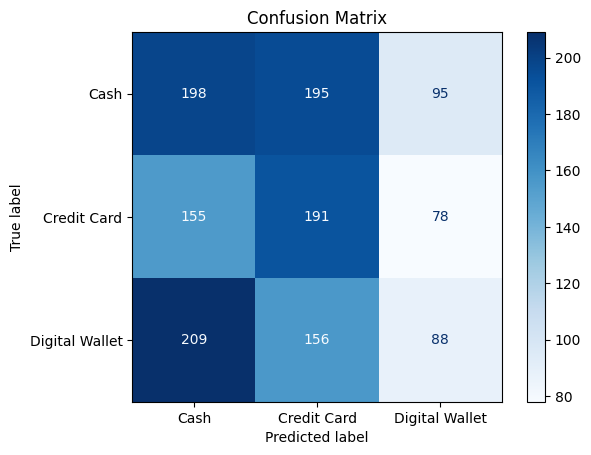

In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Prediksi kelas pada data test ---
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# --- 2. Buat confusion matrix ---
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Ambil nama kelas asli dari LabelEncoder
class_names = le.classes_

# --- 3. Tampilkan confusion matrix ---
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()


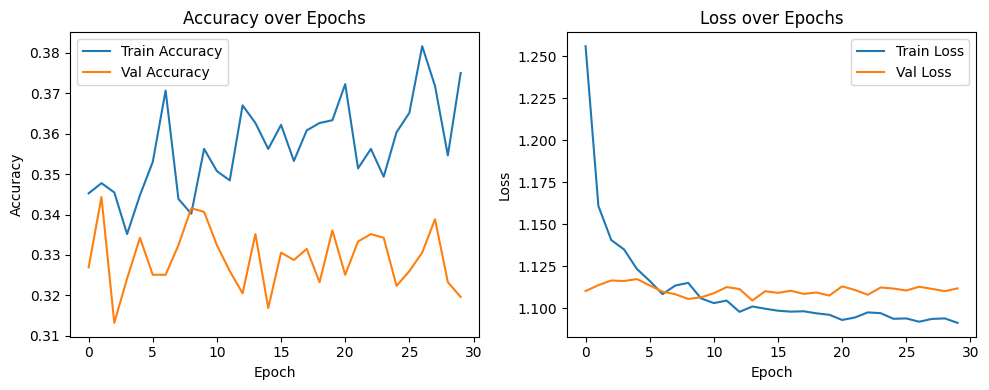

In [53]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [54]:
# Ambil hasil training terakhir
last_epoch = len(history.history['loss']) - 1

train_loss = history.history['loss'][last_epoch]
val_loss = history.history['val_loss'][last_epoch]
train_acc = history.history['accuracy'][last_epoch]
val_acc = history.history['val_accuracy'][last_epoch]

print(f"Epoch terakhir: {last_epoch + 1}")
print(f"Train Loss     : {train_loss:.4f}")
print(f"Val Loss       : {val_loss:.4f}")
print(f"Train Accuracy : {train_acc:.4f}")
print(f"Val Accuracy   : {val_acc:.4f}")

# Evaluasi apakah overfitting terjadi
if train_acc - val_acc > 0.05:
    print("\n⚠️  Overfitting terdeteksi: training accuracy jauh lebih tinggi dari validation.")
elif val_loss > train_loss * 1.2:
    print("\n⚠️  Overfitting kemungkinan besar terjadi: validation loss jauh lebih tinggi.")
else:
    print("\n✅  Tidak ada indikasi overfitting signifikan.")


Epoch terakhir: 30
Train Loss     : 1.0913
Val Loss       : 1.1118
Train Accuracy : 0.3750
Val Accuracy   : 0.3196

⚠️  Overfitting terdeteksi: training accuracy jauh lebih tinggi dari validation.


In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Ubah y_train & y_test dari one-hot ke label biasa
y_train_labels = np.argmax(y_train, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Buat model RandomForest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train_labels)

# Prediksi
y_pred = rf_model.predict(X_test)

# Evaluasi akurasi
accuracy = accuracy_score(y_test_labels, y_pred)
print(f"Random Forest Test Accuracy: {accuracy:.4f}")

# Report detail
print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred, target_names=le.classes_))


Random Forest Test Accuracy: 0.3231

Classification Report:
                precision    recall  f1-score   support

          Cash       0.33      0.30      0.31       488
   Credit Card       0.31      0.38      0.34       424
Digital Wallet       0.34      0.30      0.32       453

      accuracy                           0.32      1365
     macro avg       0.32      0.32      0.32      1365
  weighted avg       0.33      0.32      0.32      1365



In [56]:
# Akurasi pada training set
train_acc = rf_model.score(X_train, y_train_labels)

# Akurasi pada testing set
test_acc = rf_model.score(X_test, y_test_labels)

# Tampilkan hasil
print(f"Train Accuracy : {train_acc:.4f}")
print(f"Test Accuracy  : {test_acc:.4f}")

# Evaluasi overfitting
gap = train_acc - test_acc

if gap > 0.05:
    print("\n⚠️  Overfitting terdeteksi: model jauh lebih bagus di training daripada testing.")
elif gap < -0.05:
    print("\n⚠️  Underfitting kemungkinan terjadi: model buruk di training tapi malah lebih bagus di testing.")
else:
    print("\n✅  Tidak ada tanda overfitting signifikan. Model generalisasi dengan baik.")


Train Accuracy : 0.4235
Test Accuracy  : 0.3231

⚠️  Overfitting terdeteksi: model jauh lebih bagus di training daripada testing.


In [57]:
# Kalau masih pakai df_clean
label_counts = df_clean['Payment Method'].value_counts(normalize=True) * 100

print("Distribusi Payment Method (%):")
print(label_counts)


Distribusi Payment Method (%):
Payment Method
Digital Wallet    33.582527
Credit Card       33.318675
Cash              33.098798
Name: proportion, dtype: float64


In [60]:
# Pastikan kolom 'Transaction Date' sudah dalam format datetime
df_clean['Transaction Date'] = pd.to_datetime(df_clean['Transaction Date'])

# Buat fitur turunan tanggal
df_clean['Year'] = df_clean['Transaction Date'].dt.year
df_clean['Month'] = df_clean['Transaction Date'].dt.month
df_clean['Day'] = df_clean['Transaction Date'].dt.day
df_clean['DayOfWeek'] = df_clean['Transaction Date'].dt.dayofweek  # Senin=0, Minggu=6
df_clean['IsWeekend'] = df_clean['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)
df_clean['Quarter'] = df_clean['Transaction Date'].dt.quarter

# Kalau mau, hapus kolom asli kalau dirasa sudah cukup fitur turunan
df_clean.drop('Transaction Date', axis=1, inplace=True)


In [62]:
# Fitur awal
selected_features = ['Quantity', 'Price Per Unit', 'Total Spent', 'Item', 'Location']

# Tambah fitur tanggal
selected_features += ['Year', 'Month', 'Day', 'DayOfWeek', 'IsWeekend', 'Quarter']


In [63]:
categorical_features = ['Item', 'Location', 'Month', 'Quarter']

# One-hot encode kolom kategori (drop_first=True untuk menghindari dummy trap)
X = pd.get_dummies(df_clean[selected_features], columns=categorical_features, drop_first=True)


In [64]:
from sklearn.preprocessing import StandardScaler

num_features = ['Quantity', 'Price Per Unit', 'Total Spent', 'Year', 'Day', 'DayOfWeek', 'IsWeekend']

scaler = StandardScaler()
X[num_features] = scaler.fit_transform(X[num_features])


In [70]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, Embedding, Flatten, Concatenate
from tensorflow.keras.utils import to_categorical

# 1. Encode kategori sebagai integer (untuk embedding)
item_le = LabelEncoder()
location_le = LabelEncoder()

df_clean['Item_enc'] = item_le.fit_transform(df_clean['Item'])
df_clean['Location_enc'] = location_le.fit_transform(df_clean['Location'])

# 2. Siapkan fitur numerik dan kategori
num_cols = ['Quantity', 'Price Per Unit', 'Total Spent', 'Year', 'Month', 'Day', 'DayOfWeek', 'IsWeekend', 'Quarter']
X_num = df_clean[num_cols]
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num)

X_item = df_clean['Item_enc'].values
X_location = df_clean['Location_enc'].values

# 3. Target encoding
y = df_clean['Payment Method']
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_cat = to_categorical(y_encoded)

# 4. Split data
X_num_train, X_num_test, X_item_train, X_item_test, X_loc_train, X_loc_test, y_train, y_test = train_test_split(
    X_num_scaled, X_item, X_location, y_cat, test_size=0.2, random_state=42
)

# 5. Model input layers
input_num = Input(shape=(X_num_train.shape[1],), name='numeric_input')
input_item = Input(shape=(1,), name='item_input')
input_location = Input(shape=(1,), name='location_input')

# 6. Embedding layers
embed_dim = 8

item_embed = Embedding(input_dim=len(item_le.classes_), output_dim=embed_dim, input_length=1)(input_item)
item_embed = Flatten()(item_embed)

location_embed = Embedding(input_dim=len(location_le.classes_), output_dim=embed_dim, input_length=1)(input_location)
location_embed = Flatten()(location_embed)

# 7. Gabungkan semua fitur
x = Concatenate()([input_num, item_embed, location_embed])

# 8. Dense layers
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)

x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

x = Dense(64, activation='relu')(x)

# 9. Output layer
output = Dense(y_cat.shape[1], activation='softmax')(x)

# 10. Model compile
model = Model(inputs=[input_num, input_item, input_location], outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 11. Train model
history = model.fit(
    [X_num_train, X_item_train, X_loc_train], y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=32,
    verbose=2
)


Epoch 1/30


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


137/137 - 3s - 23ms/step - accuracy: 0.3255 - loss: 1.2921 - val_accuracy: 0.3507 - val_loss: 1.1180
Epoch 2/30
137/137 - 0s - 3ms/step - accuracy: 0.3393 - loss: 1.1770 - val_accuracy: 0.3104 - val_loss: 1.1176
Epoch 3/30
137/137 - 0s - 3ms/step - accuracy: 0.3365 - loss: 1.1567 - val_accuracy: 0.3361 - val_loss: 1.1104
Epoch 4/30
137/137 - 0s - 3ms/step - accuracy: 0.3482 - loss: 1.1381 - val_accuracy: 0.3178 - val_loss: 1.1242
Epoch 5/30
137/137 - 0s - 3ms/step - accuracy: 0.3546 - loss: 1.1289 - val_accuracy: 0.3141 - val_loss: 1.1295
Epoch 6/30
137/137 - 0s - 3ms/step - accuracy: 0.3501 - loss: 1.1228 - val_accuracy: 0.3352 - val_loss: 1.1219
Epoch 7/30
137/137 - 0s - 3ms/step - accuracy: 0.3473 - loss: 1.1210 - val_accuracy: 0.3278 - val_loss: 1.1292
Epoch 8/30
137/137 - 0s - 3ms/step - accuracy: 0.3588 - loss: 1.1172 - val_accuracy: 0.3159 - val_loss: 1.1273
Epoch 9/30
137/137 - 0s - 3ms/step - accuracy: 0.3464 - loss: 1.1131 - val_accuracy: 0.3242 - val_loss: 1.1187
Epoch 10/30

In [71]:
# 12. Evaluasi
loss, accuracy = model.evaluate([X_num_test, X_item_test, X_loc_test], y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 1.1177
Test Accuracy: 0.3443


In [73]:
# Misal kamu punya data test untuk 3 input: X_num_test, X_item_test, X_loc_test
y_pred_probs = model.predict([X_num_test, X_item_test, X_loc_test])

y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=le.classes_))


43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  
Confusion Matrix:
[[112 197 179]
 [102 179 143]
 [103 171 179]]

Classification Report:
                precision    recall  f1-score   support

          Cash       0.35      0.23      0.28       488
   Credit Card       0.33      0.42      0.37       424
Digital Wallet       0.36      0.40      0.38       453

      accuracy                           0.34      1365
     macro avg       0.35      0.35      0.34      1365
  weighted avg       0.35      0.34      0.34      1365



In [74]:
df_clean['TPU'] = df_clean['Total Spent'] / df_clean['Quantity']


In [75]:
df_clean['Weekend_Month'] = df_clean['IsWeekend'] * df_clean['Month']


In [76]:
item_freq = df_clean['Item'].value_counts(normalize=True)
location_freq = df_clean['Location'].value_counts(normalize=True)

df_clean['Item_Freq'] = df_clean['Item'].map(item_freq)
df_clean['Location_Freq'] = df_clean['Location'].map(location_freq)


In [77]:
avg_price_per_item = df_clean.groupby('Item')['Price Per Unit'].transform('mean')
df_clean['Price_vs_Avg'] = df_clean['Price Per Unit'] / avg_price_per_item


In [78]:
df_clean

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Year,Month,Day,DayOfWeek,IsWeekend,Quarter,Item_enc,Location_enc,TPU,Weekend_Month,Item_Freq,Location_Freq,Price_vs_Avg
0,TXN_1961373,Coffee,2.0,2.0,0.959135,Credit Card,Takeaway,2023,9,8,4,0,3,1,1,0.479567,0,0.110085,0.304456,0.999335
1,TXN_4977031,Cake,4.0,3.0,1.271150,Cash,In-store,2023,5,16,1,0,2,0,0,0.317787,0,0.113603,0.304603,1.000000
2,TXN_4271903,Cookie,4.0,1.0,0.959135,Credit Card,In-store,2023,7,19,2,0,3,2,0,0.239784,0,0.111844,0.304603,0.987063
4,TXN_3160411,Coffee,2.0,2.0,0.959135,Digital Wallet,In-store,2023,6,11,6,1,2,1,0,0.479567,6,0.110085,0.304603,0.999335
5,TXN_2602893,Smoothie,5.0,4.0,1.397363,Credit Card,Unknown,2023,3,31,4,0,1,6,2,0.279473,0,0.108912,0.390941,1.001010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,TXN_4766549,Smoothie,2.0,4.0,1.162283,Cash,Unknown,2023,10,20,4,0,4,6,2,0.581142,0,0.108912,0.390941,1.001010
9996,TXN_9659401,Unknown,3.0,1.0,0.869742,Digital Wallet,Unknown,2023,6,2,4,0,2,8,2,0.289914,0,0.097918,0.390941,0.335932
9997,TXN_5255387,Coffee,4.0,2.0,1.162283,Digital Wallet,Unknown,2023,3,2,3,0,1,1,2,0.290571,0,0.110085,0.390941,0.999335
9998,TXN_7695629,Cookie,3.0,1.0,0.869742,Digital Wallet,Unknown,2023,12,2,5,1,4,2,2,0.289914,12,0.111844,0.390941,0.987063


In [79]:
selected_features = [
    'Quantity', 'Price Per Unit', 'Total Spent',
    'Item', 'Location', 
    'Year', 'Month', 'Day', 'DayOfWeek', 'IsWeekend', 'Quarter',
    # fitur baru:
    'TPU',                # Total Spent per Unit
    'Weekend_Month',      # Interaksi IsWeekend * Month
    'Item_Freq',          # Frekuensi item
    'Location_Freq',      # Frekuensi lokasi
    'Price_vs_Avg'        # Harga relatif dibanding rata-rata per item
]


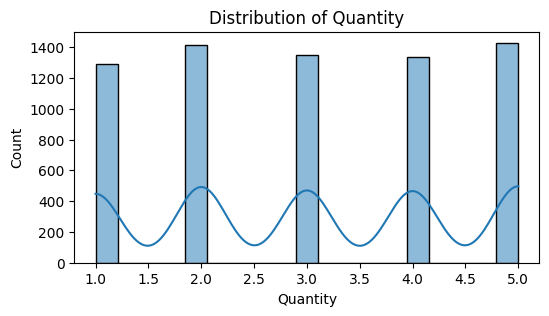

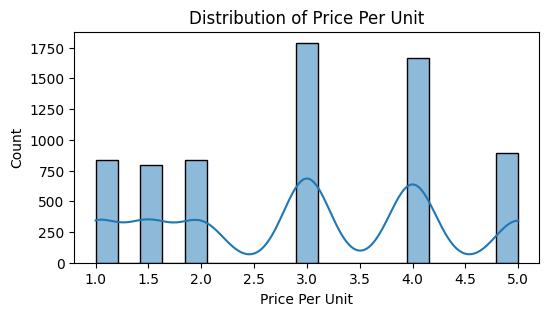

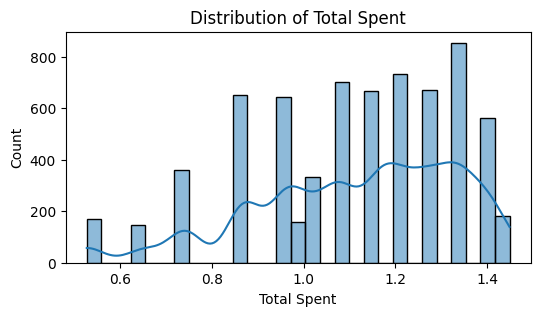

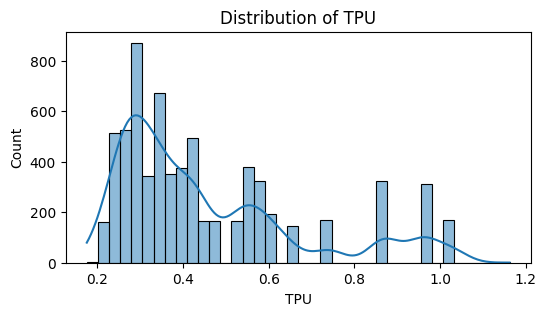

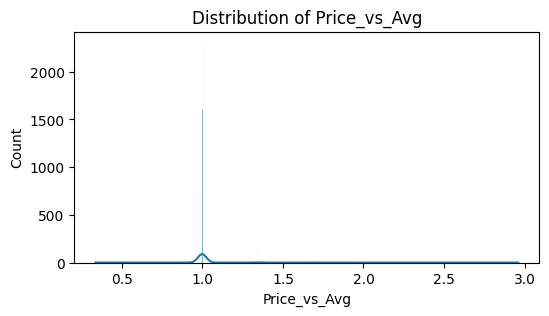

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['Quantity', 'Price Per Unit', 'Total Spent', 'TPU', 'Price_vs_Avg']  # contoh fitur numerik baru

for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.histplot(df_clean[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


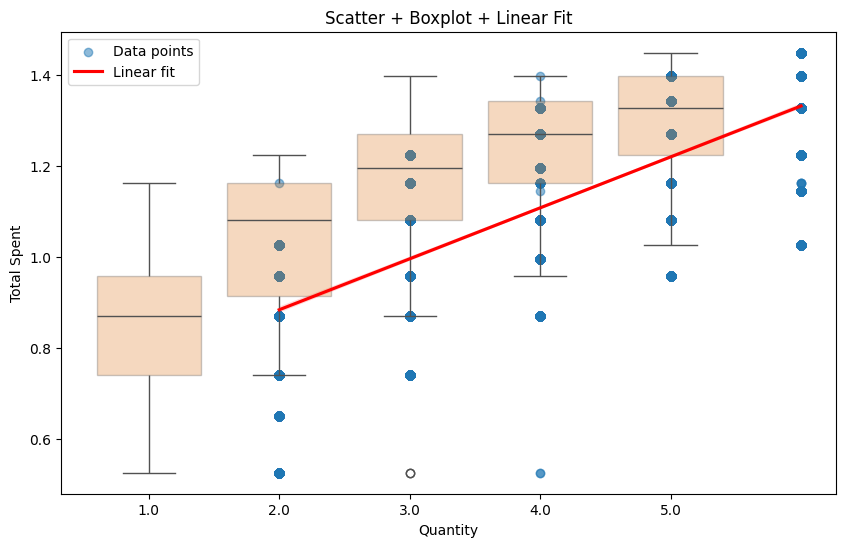

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Misal kita cek outlier pada 'Total Spent' berdasarkan 'Quantity'

x = df_clean['Quantity']
y = df_clean['Total Spent']

plt.figure(figsize=(10,6))

# Scatter plot titik-titik data
plt.scatter(x, y, alpha=0.5, label='Data points')

# Buat box untuk outlier pada sumbu y (Total Spent)
sns.boxplot(x=x, y=y, whis=1.5, showcaps=True, boxprops=dict(alpha=0.3))

# Tambah garis linear (regresi)
sns.regplot(x=x, y=y, scatter=False, color='red', label='Linear fit')

plt.xlabel('Quantity')
plt.ylabel('Total Spent')
plt.title('Scatter + Boxplot + Linear Fit')

plt.legend()
plt.show()


In [84]:
print(df_clean[num_cols].describe())


          Quantity  Price Per Unit  Total Spent          TPU  Price_vs_Avg
count  6822.000000     6822.000000  6822.000000  6822.000000   6822.000000
mean      3.030196        2.962621     1.111496     0.453987      1.000000
std       1.412854        1.282657     0.220094     0.217254      0.149044
min       1.000000        1.000000     0.526589     0.175530      0.335932
25%       2.000000        2.000000     0.959135     0.289764      0.991814
50%       3.000000        3.000000     1.162283     0.370638      1.000000
75%       4.000000        4.000000     1.271150     0.540209      1.000655
max       5.000000        5.000000     1.448822     1.162283      2.961190


In [85]:
def detect_outliers(col):
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df_clean[(df_clean[col] < lower) | (df_clean[col] > upper)]
    return len(outliers), outliers[col].min(), outliers[col].max()

for col in num_cols:
    count, min_out, max_out = detect_outliers(col)
    print(f"{col}: {count} outliers (min={min_out}, max={max_out})")


Quantity: 0 outliers (min=nan, max=nan)
Price Per Unit: 0 outliers (min=nan, max=nan)
Total Spent: 0 outliers (min=nan, max=nan)
TPU: 483 outliers (min=0.9591348389208239, max=1.1622831138840004)
Price_vs_Avg: 516 outliers (min=0.33593160673874783, max=2.961190168175938)


In [87]:
# Tambah fitur TPU: Total Per Unit
df_clean['TPU'] = df_clean['Total Spent'] / (df_clean['Quantity'] * df_clean['Price Per Unit'])

# Tambah fitur Price_vs_Avg: perbandingan harga terhadap rata-rata per item
avg_price_per_item = df_clean.groupby('Item')['Price Per Unit'].transform('mean')
df_clean['Price_vs_Avg'] = df_clean['Price Per Unit'] / avg_price_per_item


In [88]:
selected_features += ['TPU', 'Price_vs_Avg']


In [90]:
selected_features = list(dict.fromkeys(selected_features))


In [92]:
X = df_clean[selected_features].copy()


In [93]:
from sklearn.preprocessing import MinMaxScaler

minmax_cols = ['TPU', 'Price_vs_Avg']
scaler = MinMaxScaler()
X[minmax_cols] = scaler.fit_transform(X[minmax_cols])


In [94]:
df_clean

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Year,Month,Day,DayOfWeek,IsWeekend,Quarter,Item_enc,Location_enc,TPU,Weekend_Month,Item_Freq,Location_Freq,Price_vs_Avg
0,TXN_1961373,Coffee,2.0,2.0,0.959135,Credit Card,Takeaway,2023,9,8,4,0,3,1,1,0.239784,0,0.110085,0.304456,0.999335
1,TXN_4977031,Cake,4.0,3.0,1.271150,Cash,In-store,2023,5,16,1,0,2,0,0,0.105929,0,0.113603,0.304603,1.000000
2,TXN_4271903,Cookie,4.0,1.0,0.959135,Credit Card,In-store,2023,7,19,2,0,3,2,0,0.239784,0,0.111844,0.304603,0.987063
4,TXN_3160411,Coffee,2.0,2.0,0.959135,Digital Wallet,In-store,2023,6,11,6,1,2,1,0,0.239784,6,0.110085,0.304603,0.999335
5,TXN_2602893,Smoothie,5.0,4.0,1.397363,Credit Card,Unknown,2023,3,31,4,0,1,6,2,0.069868,0,0.108912,0.390941,1.001010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,TXN_4766549,Smoothie,2.0,4.0,1.162283,Cash,Unknown,2023,10,20,4,0,4,6,2,0.145285,0,0.108912,0.390941,1.001010
9996,TXN_9659401,Unknown,3.0,1.0,0.869742,Digital Wallet,Unknown,2023,6,2,4,0,2,8,2,0.289914,0,0.097918,0.390941,0.335932
9997,TXN_5255387,Coffee,4.0,2.0,1.162283,Digital Wallet,Unknown,2023,3,2,3,0,1,1,2,0.145285,0,0.110085,0.390941,0.999335
9998,TXN_7695629,Cookie,3.0,1.0,0.869742,Digital Wallet,Unknown,2023,12,2,5,1,4,2,2,0.289914,12,0.111844,0.390941,0.987063


In [95]:
import xgboost as xgb

In [96]:
# Target label
le = LabelEncoder()
y = le.fit_transform(df_clean['Payment Method'])

# Fitur yang akan digunakan
selected_features = [
    'Quantity', 'Price Per Unit', 'Total Spent',
    'Year', 'Month', 'Day', 'DayOfWeek', 'IsWeekend', 'Quarter',
    'Item_enc', 'Location_enc',
    'TPU', 'Weekend_Month', 'Item_Freq', 'Location_Freq', 'Price_vs_Avg'
]

X = df_clean[selected_features].copy()


In [97]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
model_xgb = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(np.unique(y)),
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)

model_xgb.fit(X_train, y_train)


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:02:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=3, ...)

In [98]:
y_pred = model_xgb.predict(X_test)

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=le.classes_)

print(f"🔍 Test Accuracy: {acc:.4f}")
print("\n📉 Confusion Matrix:")
print(cm)
print("\n📊 Classification Report:")
print(report)


🔍 Test Accuracy: 0.3465

📉 Confusion Matrix:
[[155 156 141]
 [145 142 168]
 [142 140 176]]

📊 Classification Report:
                precision    recall  f1-score   support

          Cash       0.35      0.34      0.35       452
   Credit Card       0.32      0.31      0.32       455
Digital Wallet       0.36      0.38      0.37       458

      accuracy                           0.35      1365
     macro avg       0.35      0.35      0.35      1365
  weighted avg       0.35      0.35      0.35      1365



In [99]:
# Label encoding untuk target
le = LabelEncoder()
y = le.fit_transform(df_clean['Payment Method'])
y_cat = to_categorical(y)

# Pilih fitur
selected_features = [
    'Quantity', 'Price Per Unit', 'Total Spent',
    'Year', 'Month', 'Day', 'DayOfWeek', 'IsWeekend', 'Quarter',
    'Item_enc', 'Location_enc',
    'TPU', 'Weekend_Month', 'Item_Freq', 'Location_Freq', 'Price_vs_Avg'
]

X = df_clean[selected_features].copy()

# Scaling fitur numerik
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [101]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_cat, test_size=0.2, random_state=0, stratify=y
)
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(3, activation='softmax')  # 3 kelas: Cash, Credit Card, Digital Wallet
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=32,
    verbose=1
)


Epoch 1/30


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


171/171 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3373 - loss: 1.1094 - val_accuracy: 0.3538 - val_loss: 1.0977
Epoch 2/30
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3409 - loss: 1.1030 - val_accuracy: 0.3319 - val_loss: 1.0988
Epoch 3/30
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3348 - loss: 1.1018 - val_accuracy: 0.3385 - val_loss: 1.0986
Epoch 4/30
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3436 - loss: 1.0986 - val_accuracy: 0.3465 - val_loss: 1.0982
Epoch 5/30
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3384 - loss: 1.0978 - val_accuracy: 0.3465 - val_loss: 1.0984
Epoch 6/30
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3294 - loss: 1.1014 - val_accuracy: 0.3546 - val_loss: 1.0981
Epoch 7/30
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3543 - loss: 1.0981 - val_accuracy: 0.3267 - val_loss: 1.0984
Epoch 8/30
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3558 - loss: 1.0969 - val_accuracy: 0.3414 - val_

In [102]:
loss, acc = model.evaluate(X_test, y_test)
print(f"📉 Test Loss: {loss:.4f}")
print(f"✅ Test Accuracy: {acc:.4f}")


43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3528 - loss: 1.1027 
📉 Test Loss: 1.1019
✅ Test Accuracy: 0.3495


In [103]:
import numpy as np

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

print("\n📊 Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

print("\n📄 Classification Report:")
print(classification_report(y_true, y_pred, target_names=le.classes_))


43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

📊 Confusion Matrix:
[[174  69 209]
 [175  79 201]
 [171  63 224]]

📄 Classification Report:
                precision    recall  f1-score   support

          Cash       0.33      0.38      0.36       452
   Credit Card       0.37      0.17      0.24       455
Digital Wallet       0.35      0.49      0.41       458

      accuracy                           0.35      1365
     macro avg       0.35      0.35      0.34      1365
  weighted avg       0.35      0.35      0.34      1365



In [105]:
from tensorflow.keras.optimizers import Adam

def create_mlp_model(input_dim, hidden_layers=[64, 32], dropout_rate=0.3, learning_rate=0.001):
    inputs = Input(shape=(input_dim,))
    x = inputs
    
    # Tambah hidden layers sesuai list hidden_layers
    for units in hidden_layers:
        x = Dense(units, activation='relu')(x)
        x = Dropout(dropout_rate)(x)
    
    outputs = Dense(3, activation='softmax')(x)  # 3 kelas output
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Contoh panggil model dengan konfigurasi yang ingin diuji
input_dim = X_train.shape[1]

model = create_mlp_model(input_dim, hidden_layers=[128, 64, 32], dropout_rate=0.4, learning_rate=0.0005)

model.summary()

# Training (misal epochs 50, batch size 32)
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32)


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 128)                 │           2,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,611 (49.26 KB)

 Trainable params: 12,611 (49.26 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3230 - loss: 1.1245 - val_accuracy: 0.3297 - val_loss: 1.1001
Epoch 2/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3350 - loss: 1.1073 - val_accuracy: 0.3260 - val_loss: 1.0997
Epoch 3/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3395 - loss: 1.1031 - val_accuracy: 0.3132 - val_loss: 1.0997
Epoch 4/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3241 - loss: 1.1040 - val_accuracy: 0.3150 - val_loss: 1.0997
Epoch 5/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3239 - loss: 1.1019 - val_accuracy: 0.3040 - val_loss: 1.1001
Epoch 6/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3273 - loss: 1.1006 - val_accuracy: 0.2949 - val_loss: 1.0996
Epoch 7/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3268 - loss: 1.1001 - val_accuracy: 0.2940 - val_loss: 1.0999
Epoch 8/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3438 - loss: 1.0981 - val_accuracy: 0.

In [106]:
import numpy as np

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

print("\n📊 Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

print("\n📄 Classification Report:")
print(classification_report(y_true, y_pred, target_names=le.classes_))


43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

📊 Confusion Matrix:
[[267  82 103]
 [268  84 103]
 [270  80 108]]

📄 Classification Report:
                precision    recall  f1-score   support

          Cash       0.33      0.59      0.42       452
   Credit Card       0.34      0.18      0.24       455
Digital Wallet       0.34      0.24      0.28       458

      accuracy                           0.34      1365
     macro avg       0.34      0.34      0.31      1365
  weighted avg       0.34      0.34      0.31      1365



In [112]:
import numpy as np

y_test_labels = np.argmax(y_test, axis=1)
wrong_idx = np.where(y_pred_classes != y_test_labels)[0]

# Jika X_test adalah numpy array
X_wrong = X_test[wrong_idx]

# Jika X_test adalah pandas DataFrame, pakai ini:
# X_wrong = X_test.iloc[wrong_idx]

y_wrong_true = y_test_labels[wrong_idx]
y_wrong_pred = y_pred_classes[wrong_idx]


In [115]:
# Misal kolom TPU di index ke-14 (sesuaikan sesuai data kamu)
idx_TPU = 14

TPU_all = X_test[:, idx_TPU]
TPU_wrong = TPU_all[wrong_idx]

mean_all = np.mean(TPU_all)
std_all = np.std(TPU_all)
mean_wrong = np.mean(TPU_wrong)
std_wrong = np.std(TPU_wrong)

print("Analisis fitur TPU:")
print(f"- Rata-rata TPU pada seluruh data test: {mean_all:.4f}")
print(f"- Standar deviasi TPU pada seluruh data test: {std_all:.4f}")
print(f"- Rata-rata TPU pada data yang salah diprediksi: {mean_wrong:.4f}")
print(f"- Standar deviasi TPU pada data yang salah diprediksi: {std_wrong:.4f}")

if mean_wrong > mean_all:
    print("- TPU pada data salah prediksi cenderung lebih tinggi dari rata-rata keseluruhan.")
else:
    print("- TPU pada data salah prediksi cenderung lebih rendah dari rata-rata keseluruhan.")


Analisis fitur TPU:
- Rata-rata TPU pada seluruh data test: 0.3690
- Standar deviasi TPU pada seluruh data test: 0.4820
- Rata-rata TPU pada data yang salah diprediksi: 0.3670
- Standar deviasi TPU pada data yang salah diprediksi: 0.4814
- TPU pada data salah prediksi cenderung lebih rendah dari rata-rata keseluruhan.


In [117]:
import numpy as np

# Hapus kolom TPU di index 14 dari numpy array X_train dan X_test
X_train = np.delete(X_train, 14, axis=1)
X_test = np.delete(X_test, 14, axis=1)


In [118]:
print(type(X))


<class 'pandas.core.frame.DataFrame'>


In [119]:
print(X.columns)


Index(['Quantity', 'Price Per Unit', 'Total Spent', 'Year', 'Month', 'Day',
       'DayOfWeek', 'IsWeekend', 'Quarter', 'Item_enc', 'Location_enc',
       'Weekend_Month', 'Item_Freq', 'Location_Freq', 'Price_vs_Avg'],
      dtype='object')


In [120]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [121]:
print(X_train.describe())


          Quantity  Price Per Unit  Total Spent    Year        Month  \
count  5457.000000     5457.000000  5457.000000  5457.0  5457.000000   
mean      3.022906        2.964633     1.111176  2023.0     6.615906   
std       1.409939        1.282436     0.219453     0.0     3.380093   
min       1.000000        1.000000     0.526589  2023.0     1.000000   
25%       2.000000        2.000000     0.959135  2023.0     4.000000   
50%       3.000000        3.000000     1.162283  2023.0     7.000000   
75%       4.000000        4.000000     1.271150  2023.0     9.000000   
max       5.000000        5.000000     1.448822  2023.0    12.000000   

               Day    DayOfWeek    IsWeekend      Quarter     Item_enc  \
count  5457.000000  5457.000000  5457.000000  5457.000000  5457.000000   
mean     15.181052     3.146601     0.315741     2.549569     3.897563   
std       8.985479     2.053836     0.464853     1.101256     2.524068   
min       1.000000     0.000000     0.000000     1.0000

In [122]:
print(np.unique(y_train))
print(y_train[:10])


[0 1 2]
[2 2 2 2 1 0 1 1 2 1]


In [129]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Inisialisasi label encoder dan transform label asli
label_encoder = LabelEncoder()
y_train_int = label_encoder.fit_transform(y_train)
y_test_int = label_encoder.transform(y_test)

# One-hot encode untuk MLP
y_train_enc = to_categorical(y_train_int)
y_test_enc = to_categorical(y_test_int)

# Jumlah kelas
num_classes = len(label_encoder.classes_)


In [130]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),
    
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.1),

    Dense(num_classes, activation='softmax')
])

optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks untuk training yang lebih optimal
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1),
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
]

history = model.fit(
    X_train_scaled, y_train_enc,
    validation_split=0.1,
    epochs=50,
    batch_size=64,
    callbacks=callbacks,
    verbose=2
)


Epoch 1/50


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


77/77 - 5s - 65ms/step - accuracy: 0.3362 - loss: 1.3755 - val_accuracy: 0.3278 - val_loss: 1.1050 - learning_rate: 0.0010
Epoch 2/50
77/77 - 1s - 7ms/step - accuracy: 0.3362 - loss: 1.2295 - val_accuracy: 0.3260 - val_loss: 1.1162 - learning_rate: 0.0010
Epoch 3/50
77/77 - 1s - 7ms/step - accuracy: 0.3341 - loss: 1.1793 - val_accuracy: 0.3278 - val_loss: 1.1226 - learning_rate: 0.0010
Epoch 4/50
77/77 - 1s - 7ms/step - accuracy: 0.3396 - loss: 1.1533 - val_accuracy: 0.3278 - val_loss: 1.1198 - learning_rate: 0.0010
Epoch 5/50
77/77 - 1s - 7ms/step - accuracy: 0.3396 - loss: 1.1401 - val_accuracy: 0.3498 - val_loss: 1.1176 - learning_rate: 0.0010
Epoch 6/50

Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
77/77 - 1s - 7ms/step - accuracy: 0.3443 - loss: 1.1254 - val_accuracy: 0.3242 - val_loss: 1.1218 - learning_rate: 0.0010
Epoch 7/50
77/77 - 1s - 6ms/step - accuracy: 0.3582 - loss: 1.1182 - val_accuracy: 0.3168 - val_loss: 1.1189 - learning_rate: 5.0000e-0

In [132]:
target_names = ['Cash', 'Credit Card', 'Digital Wallet']

print(classification_report(y_true, y_pred_classes, target_names=target_names))


                precision    recall  f1-score   support

          Cash       0.38      0.01      0.01       488
   Credit Card       0.31      0.81      0.45       424
Digital Wallet       0.33      0.19      0.24       453

      accuracy                           0.32      1365
     macro avg       0.34      0.34      0.24      1365
  weighted avg       0.34      0.32      0.23      1365



43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
📄 Classification Report:
                precision    recall  f1-score   support

          Cash       0.38      0.01      0.01       488
   Credit Card       0.31      0.81      0.45       424
Digital Wallet       0.33      0.19      0.24       453

      accuracy                           0.32      1365
     macro avg       0.34      0.34      0.24      1365
  weighted avg       0.34      0.32      0.23      1365



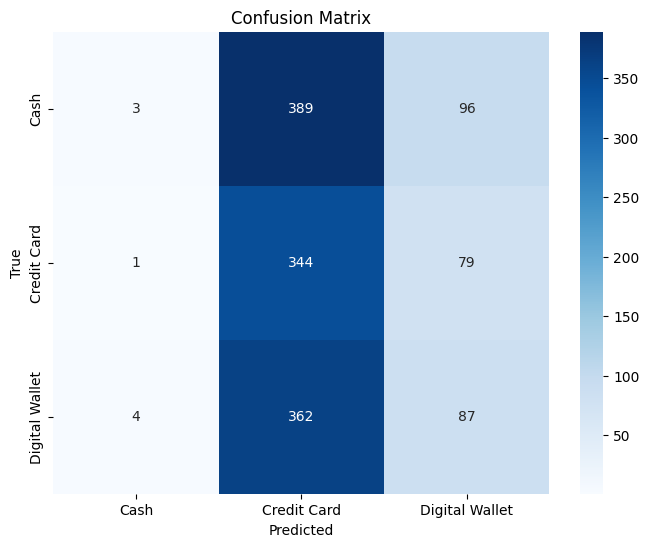

In [134]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Misal y_test adalah label asli (integer encoded)
# y_pred_probs adalah prediksi probabilitas dari model
y_pred_probs = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Nama kelas sesuai dengan label encoding yang kamu pakai
target_names = ['Cash', 'Credit Card', 'Digital Wallet']

# Classification report
print("📄 Classification Report:")
print(classification_report(y_test, y_pred_classes, target_names=target_names))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [135]:
print("Shape X_train_scaled:", X_train_scaled.shape)
print("Shape X_test_scaled:", X_test_scaled.shape)
print("Shape y_train:", y_train.shape)
print("Shape y_test:", y_test.shape)

# Contoh lihat 5 baris pertama fitur train
print("X_train_scaled sample:")
print(X_train_scaled[:5])

# Contoh lihat 5 label pertama train
print("y_train sample:")
print(y_train[:5])

# Pastikan y_train dan y_test berupa array 1 dimensi integer label (bukan one-hot)
print("y_train unique classes:", np.unique(y_train))
print("y_test unique classes:", np.unique(y_test))


Shape X_train_scaled: (5457, 15)
Shape X_test_scaled: (1365, 15)
Shape y_train: (5457,)
Shape y_test: (1365,)
X_train_scaled sample:
[[ 6.93067648e-01 -1.14217492e+00 -1.40171317e-01  0.00000000e+00
   7.05398528e-01 -1.02185901e+00 -5.58324050e-01 -6.79290408e-01
   4.09052957e-01  1.22925430e+00  1.11208495e+00 -5.83250527e-01
  -8.04791977e-01  1.26238988e+00 -4.98132458e-02]
 [-7.25563318e-01  8.07417995e-01  2.32906142e-01  0.00000000e+00
   1.29715253e+00 -9.10558146e-01 -1.04526257e+00 -6.79290408e-01
   1.31719046e+00  8.33032168e-01  1.11208495e+00 -5.83250527e-01
  -4.24294467e-01  1.26238988e+00  1.30744723e-02]
 [ 1.40238313e+00 -1.53209351e+00 -3.85102231e-01  0.00000000e+00
   1.29715253e+00 -2.01512286e-02 -5.58324050e-01 -6.79290408e-01
   1.31719046e+00 -7.51856367e-01  1.11208495e+00 -5.83250527e-01
   5.13274197e-02  1.26238988e+00 -8.23039706e-02]
 [ 6.93067648e-01 -7.52256340e-01  2.32906142e-01  0.00000000e+00
  -1.06986347e+00  6.47653960e-01 -1.04526257e+00 -6.7

In [137]:
import numpy as np
import pandas as pd

# 1. Cek data asli (sebelum split)
print("=== Data Asli ===")
print("Shape:", X.shape)
print("Info:")
print(X.info())
print("Descriptive stats:")
print(X.describe())
print("\nLabel distribusi:")
print(pd.Series(y).value_counts())

# 2. Cek data split train dan test (sebelum scaling)
print("\n=== Data Train (sebelum scaling) ===")
print("Shape:", X_train.shape)
print("Sample:")
print(pd.DataFrame(X_train).head())
print("\nLabel distribusi train:")
print(pd.Series(y_train).value_counts())

print("\n=== Data Test (sebelum scaling) ===")
print("Shape:", X_test.shape)
print("Sample:")
print(pd.DataFrame(X_test).head())
print("\nLabel distribusi test:")
print(pd.Series(y_test).value_counts())

# 3. Cek data scaled (hasil scaler transform)
print("\n=== Data Train Scaled ===")
print("Shape:", X_train_scaled.shape)
print("Sample:")
print(X_train_scaled[:5])

print("\n=== Data Test Scaled ===")
print("Shape:", X_test_scaled.shape)
print("Sample:")
print(X_test_scaled[:5])

# 4. Pastikan label y_train dan y_test dalam bentuk integer (bukan one-hot)
print("\nLabel y_train sample:", y_train[:5])
print("Unique labels y_train:", np.unique(y_train))

print("\nLabel y_test sample:", y_test[:5])
print("Unique labels y_test:", np.unique(y_test))


=== Data Asli ===
Shape: (6822, 15)
Info:
<class 'pandas.core.frame.DataFrame'>
Index: 6822 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Quantity        6822 non-null   float64
 1   Price Per Unit  6822 non-null   float64
 2   Total Spent     6822 non-null   float64
 3   Year            6822 non-null   int32  
 4   Month           6822 non-null   int32  
 5   Day             6822 non-null   int32  
 6   DayOfWeek       6822 non-null   int32  
 7   IsWeekend       6822 non-null   int64  
 8   Quarter         6822 non-null   int32  
 9   Item_enc        6822 non-null   int32  
 10  Location_enc    6822 non-null   int32  
 11  Weekend_Month   6822 non-null   int64  
 12  Item_Freq       6822 non-null   float64
 13  Location_Freq   6822 non-null   float64
 14  Price_vs_Avg    6822 non-null   float64
dtypes: float64(6), int32(7), int64(2)
memory usage: 666.2 KB
None
Descriptive stats:
     

In [142]:
print("Duplicate rows:", X.duplicated().sum())


Duplicate rows: 584


In [141]:
df_clean = df.drop_duplicates()
print("Shape setelah hapus duplikat:", df_clean.shape)

Shape setelah hapus duplikat: (6822, 8)


In [143]:
print("Duplicate rows in full data:", df.duplicated().sum())
print("Duplicate rows in X data:", X.duplicated().sum())


Duplicate rows in full data: 0
Duplicate rows in X data: 584


In [147]:
print("Panjang X:", len(X))
print("Panjang y:", len(y))
print("Indeks duplikat max:", duplicate_indices.max())


Panjang X: 6822
Panjang y: 6822
Indeks duplikat max: 9989


In [152]:
# Reset index dulu supaya indeksnya 0 sampai len(X)-1
X_reset = X.reset_index(drop=True)
y_reset = y.copy()  # Pastikan y juga dalam urutan yang sama, kalau numpy array tinggal copy

# Cari duplikat di X_reset
duplicate_mask = X_reset.duplicated()
duplicate_indices = X_reset.index[duplicate_mask]  # Ini pasti antara 0 sampai len(X)-1

print("Max duplicate index:", duplicate_indices.max())  # Harus <= len(X_reset)-1

# Hapus duplikat di X_reset dan y_reset
X_clean = X_reset.drop(duplicate_indices)
y_clean = np.delete(y_reset, duplicate_indices.to_list(), axis=0)

print("Shape X_clean:", X_clean.shape)
print("Shape y_clean:", y_clean.shape)
print("Jumlah duplikat setelah hapus:", X_clean.duplicated().sum())


Max duplicate index: 6814
Shape X_clean: (6238, 15)
Shape y_clean: (6238,)
Jumlah duplikat setelah hapus: 0


Sample data setelah scaling:
   Quantity  Price Per Unit  Total Spent  Year     Month       Day  DayOfWeek  \
0      0.25            0.25     0.469020   0.0  0.727273  0.233333   0.666667   
1      0.75            0.50     0.807345   0.0  0.363636  0.500000   0.166667   
2      0.75            0.00     0.469020   0.0  0.545455  0.600000   0.333333   
3      0.25            0.25     0.469020   0.0  0.454545  0.333333   1.000000   
4      1.00            0.75     0.944202   0.0  0.181818  1.000000   0.666667   

   IsWeekend   Quarter  Item_enc  Location_enc  Weekend_Month  Item_Freq  \
0        0.0  0.666667     0.125           0.5            0.0   0.522013   
1        0.0  0.333333     0.000           0.0            0.0   0.672956   
2        0.0  0.666667     0.250           0.0            0.0   0.597484   
3        1.0  0.333333     0.125           0.0            0.5   0.522013   
4        0.0  0.000000     0.750           1.0            0.0   0.471698   

   Location_Freq  Price_vs_

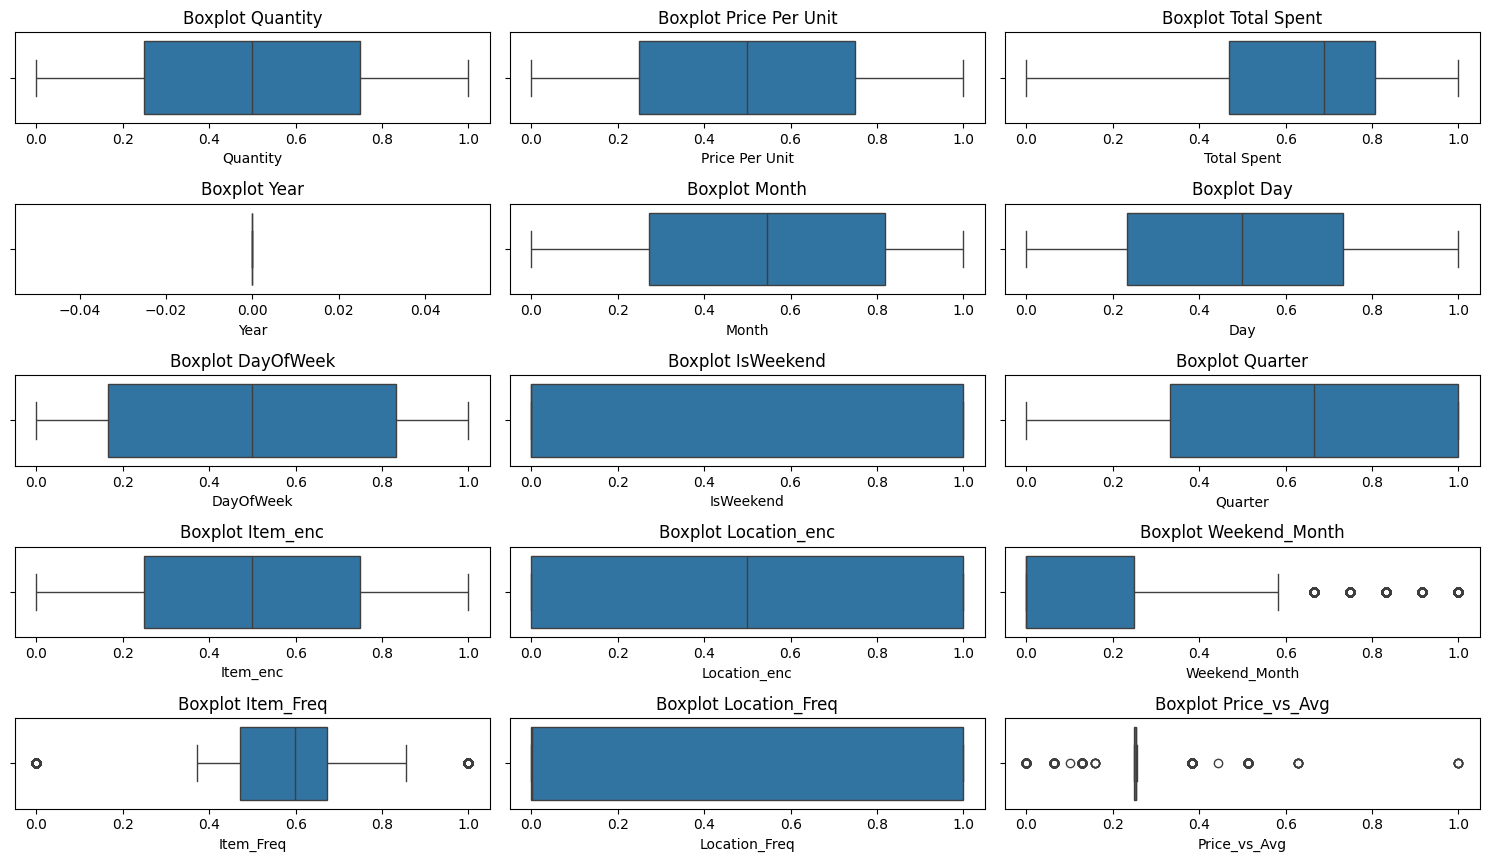

Outliers in Quantity: 0
Outliers in Price Per Unit: 0
Outliers in Total Spent: 0
Outliers in Year: 0
Outliers in Month: 0
Outliers in Day: 0
Outliers in DayOfWeek: 0
Outliers in IsWeekend: 0
Outliers in Quarter: 0
Outliers in Item_enc: 0
Outliers in Location_enc: 0
Outliers in Weekend_Month: 759
Outliers in Item_Freq: 1416
Outliers in Location_Freq: 0
Outliers in Price_vs_Avg: 506


In [153]:
# Pisahkan fitur numerik (exclude label)
numeric_features = X_clean.select_dtypes(include=['float64', 'int64', 'int32']).columns

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Skala fitur numerik
X_clean_scaled = X_clean.copy()
X_clean_scaled[numeric_features] = scaler.fit_transform(X_clean[numeric_features])

print("Sample data setelah scaling:")
print(X_clean_scaled.head())

# Cek outlier menggunakan boxplot untuk setiap fitur numerik
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_features, 1):
    plt.subplot(len(numeric_features)//3 + 1, 3, i)
    sns.boxplot(x=X_clean_scaled[col])
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

# Alternatif cek outlier dengan metode IQR
def detect_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    print(f'Outliers in {col}: {len(outliers)}')

for col in numeric_features:
    detect_outliers_iqr(X_clean_scaled, col)

In [154]:
def cap_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    data[col] = data[col].clip(lower=lower_bound, upper=upper_bound)

for col in ['Weekend_Month', 'Item_Freq', 'Price_vs_Avg']:
    cap_outliers(X_clean_scaled, col)

print("Outlier sudah dicap (winsorized).")


Outlier sudah dicap (winsorized).


In [155]:
def detect_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    print(f'Outliers in {col}: {len(outliers)}')

for col in numeric_features:
    detect_outliers_iqr(X_clean_scaled, col)

Outliers in Quantity: 0
Outliers in Price Per Unit: 0
Outliers in Total Spent: 0
Outliers in Year: 0
Outliers in Month: 0
Outliers in Day: 0
Outliers in DayOfWeek: 0
Outliers in IsWeekend: 0
Outliers in Quarter: 0
Outliers in Item_enc: 0
Outliers in Location_enc: 0
Outliers in Weekend_Month: 0
Outliers in Item_Freq: 0
Outliers in Location_Freq: 0
Outliers in Price_vs_Avg: 0


In [156]:
# Cek summary statistik setelah capping outlier
print(X_clean_scaled[['Weekend_Month', 'Item_Freq', 'Price_vs_Avg']].describe())

# Cek outlier lagi setelah capping
def cek_outlier(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    print(f"Outliers in {col}: {len(outliers)}")

for col in ['Weekend_Month', 'Item_Freq', 'Price_vs_Avg']:
    cek_outlier(X_clean_scaled, col)

# Show a sample data untuk cek visual
print(X_clean_scaled[['Weekend_Month', 'Item_Freq', 'Price_vs_Avg']].head(10))


       Weekend_Month    Item_Freq  Price_vs_Avg
count    6238.000000  6238.000000   6238.000000
mean        0.139835     0.592262      0.252129
std         0.237688     0.229772      0.002659
min         0.000000     0.169811      0.244784
25%         0.000000     0.471698      0.249836
50%         0.000000     0.597484      0.252954
75%         0.250000     0.672956      0.253203
max         0.625000     0.974843      0.258254
Outliers in Weekend_Month: 0
Outliers in Item_Freq: 0
Outliers in Price_vs_Avg: 0
   Weekend_Month  Item_Freq  Price_vs_Avg
0       0.000000   0.522013      0.252700
1       0.000000   0.672956      0.252954
2       0.000000   0.597484      0.248026
3       0.500000   0.522013      0.252700
4       0.000000   0.471698      0.253338
5       0.625000   0.603774      0.253203
6       0.000000   0.855346      0.253143
7       0.583333   0.603774      0.253203
8       0.000000   0.603774      0.253203
9       0.000000   0.855346      0.253143


In [157]:
X['Quantity_Price'] = X['Quantity'] * X['Price Per Unit']
X['Weekend_Month_ItemFreq'] = X['Weekend_Month'] * X['Item_Freq']


In [159]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)
# X_poly sekarang berisi fitur asli plus interaksi 2 fitur sekaligus


In [161]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_poly_scaled = scaler.fit_transform(X_poly)


In [162]:
print(X_clean.dtypes)
print(X_clean.isnull().sum())
print("Shape X:", X_clean.shape)
print("Shape y:", y_clean.shape)
print(np.unique(y_clean))  # cek klasifikasi  
print(y_clean.min(), y_clean.max())  # cek range regresi


Quantity          float64
Price Per Unit    float64
Total Spent       float64
Year                int32
Month               int32
Day                 int32
DayOfWeek           int32
IsWeekend           int64
Quarter             int32
Item_enc            int32
Location_enc        int32
Weekend_Month       int64
Item_Freq         float64
Location_Freq     float64
Price_vs_Avg      float64
dtype: object
Quantity          0
Price Per Unit    0
Total Spent       0
Year              0
Month             0
Day               0
DayOfWeek         0
IsWeekend         0
Quarter           0
Item_enc          0
Location_enc      0
Weekend_Month     0
Item_Freq         0
Location_Freq     0
Price_vs_Avg      0
dtype: int64
Shape X: (6238, 15)
Shape y: (6238,)
[0 1 2]
0 2


In [165]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Ganti scaler dari MinMax ke StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clean)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_clean, test_size=0.2, random_state=42)

# Model dengan struktur lebih dalam
mlp = MLPClassifier(
    hidden_layer_sizes=(128, 64, 32),
    activation='relu',
    solver='adam',
    alpha=0.0005,
    learning_rate='adaptive',
    early_stopping=True,
    max_iter=500,
    random_state=42,
    verbose=True
)

# Training
mlp.fit(X_train, y_train)

# Evaluasi
y_pred = mlp.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Iteration 1, loss = 1.12512475
Validation score: 0.354709
Iteration 2, loss = 1.09991134
Validation score: 0.322645
Iteration 3, loss = 1.09494090
Validation score: 0.312625
Iteration 4, loss = 1.09095159
Validation score: 0.312625
Iteration 5, loss = 1.08676897
Validation score: 0.324649
Iteration 6, loss = 1.08490230
Validation score: 0.336673
Iteration 7, loss = 1.08110803
Validation score: 0.352705
Iteration 8, loss = 1.07822190
Validation score: 0.298597
Iteration 9, loss = 1.07453555
Validation score: 0.306613
Iteration 10, loss = 1.07147540
Validation score: 0.314629
Iteration 11, loss = 1.06906534
Validation score: 0.334669
Iteration 12, loss = 1.06492592
Validation score: 0.336673
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Accuracy: 0.3141025641025641
              precision    recall  f1-score   support

           0       0.31      0.11      0.17       420
           1       0.31      0.41      0.35       408
           2    

In [166]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Skala ulang fitur
scaler = StandardScaler()

# Pipeline: scaling + model
pipeline = Pipeline([
    ('scaler', scaler),
    ('mlp', MLPClassifier(max_iter=500, early_stopping=True, random_state=42))
])

# Hyperparameter grid
param_grid = {
    'mlp__hidden_layer_sizes': [(64, 32), (128, 64, 32)],
    'mlp__activation': ['relu', 'tanh'],
    'mlp__alpha': [0.0001, 0.001, 0.01],
    'mlp__learning_rate': ['constant', 'adaptive'],
}

# Grid search
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=3,
    verbose=2,
    scoring='accuracy',
    n_jobs=-1
)

# Jalankan pencarian
grid_search.fit(X_clean, y_clean)

# Hasil terbaik
print("Best Params:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Params: {'mlp__activation': 'tanh', 'mlp__alpha': 0.01, 'mlp__hidden_layer_sizes': (64, 32), 'mlp__learning_rate': 'constant'}
Best Score: 0.3300728592395259
